# 'glmnet' Multinomial

## import library

In [5]:
options(jupyter.plot_mimetypes = 'image/png')
library('glmnet')
library('tm')
library('NLP')
library('RTextTools')

## read data in

In [6]:
df <- read.csv("Twitter-hate_speech-labeled_data - Sheet1.csv")
test <- read.csv("Twitter-hate_speech-test_unlabeled - Sheet1.csv")
head(df)

id,tweet_text,Label
2,"@NFLfantasy @Akbar_Gbaja Damn right, Akbar.",neutral
3,@NFLfantasy @Akbar_Gbaja I've got backup _â€°Ð³Ñžâ€°Ð«__,neutral
5,"""No one is going to replace the production of Odell Beckham Jr. He's let a lot of fantasy owners down.""-@Akbar_Gbaja https://t.co/8Nd1Knzunq",neutral
7,@Sheikh__Akbar It's actually PERFECT for you man! Always on the phone_â€°Ð³Ñžâ€°Ð«_Ðœ__â€°Ð³Ñžâ€°Ð«_Ðœ__â€°Ð³Ñžâ€°Ð«_Ðœ_,neutral
10,Was Trump right? Officers say pockets of Muslims celebrated 9/11 https://t.co/NSVY7rDwcu via @MailOnline,neutral
12,Female Killer In Las Vegas Shouted ÐƒÐšâ€°Ð«Ð£â€°Ð«_Allahu AkbarÐƒÐšâ€°Ð«Ð£ÐœÑ† As She Ran Over 40 Innocent People Last Night https://t.co/wjYGYzRCmD,neutral


## create the function to perform transformation

In [7]:
cleanCorpus <- function(corpus){
    corpus <- gsub("@\\w+", "DENOITNEM", corpus)
    corpus <- gsub("\\d+", "REBMUN", corpus)
    corpus <- gsub("https?://(.*)+", "ETISBEW", corpus)
    #corpus <- gsub("[^[:alnum:][:space:]']", "", corpus)
    corpus <- gsub("[[:punct:]]", "", corpus)
    corpus <- iconv(corpus, "latin1", "ASCII", sub="")
    return(corpus)
}

## merge df and test tweet text and create corpus

In [8]:
data <- rbind(df, test)
head(data)

id,tweet_text,Label
2,"@NFLfantasy @Akbar_Gbaja Damn right, Akbar.",neutral
3,@NFLfantasy @Akbar_Gbaja I've got backup _â€°Ð³Ñžâ€°Ð«__,neutral
5,"""No one is going to replace the production of Odell Beckham Jr. He's let a lot of fantasy owners down.""-@Akbar_Gbaja https://t.co/8Nd1Knzunq",neutral
7,@Sheikh__Akbar It's actually PERFECT for you man! Always on the phone_â€°Ð³Ñžâ€°Ð«_Ðœ__â€°Ð³Ñžâ€°Ð«_Ðœ__â€°Ð³Ñžâ€°Ð«_Ðœ_,neutral
10,Was Trump right? Officers say pockets of Muslims celebrated 9/11 https://t.co/NSVY7rDwcu via @MailOnline,neutral
12,Female Killer In Las Vegas Shouted ÐƒÐšâ€°Ð«Ð£â€°Ð«_Allahu AkbarÐƒÐšâ€°Ð«Ð£ÐœÑ† As She Ran Over 40 Innocent People Last Night https://t.co/wjYGYzRCmD,neutral


In [9]:
tail(data)

,id,tweet_text,Label
14437,14409,Biggest coon ever https://t.co/kGeoDpY8rP,NA
14438,14413,I can't deal with a slow internet connection. Just can't... #firstworldproblems,NA
14439,14422,Jet Stream the Maine Coon riding out last nightÐœ_Ðœ_ÐµÐ˜s storm with Dad. #mainecoon #cannonbeachtÐœ_Ðœ__ https://t.co/yZibE7JrYR https://t.co/lI6nmLQ0sh,NA
14440,14436,"@AryanTimsina Aryan, what is the version of Fifa?",NA
14441,14438,"I'm sorry. Did I offend your white supremacist, Aryan Nation, neo-Nazi, best fascist friends somehow? @GaltsGultch https://t.co/Zi3TzR5Vwo",NA
14442,14441,@Iamshivachari Happy birthday bro _ÐœÂ«ÐœÐ _ Have an happy year ahead _ÐœÂ«_ÐµÐƒ.._ÐœÂ«___ÐœÂ«_ÐƒÐš_ÐœÂ«_â€°Ð«__ÐœÂ«_â€°Ð«_,NA


In [6]:
# build a corpus, and specify the source to be character vectors
allCorpus <- Corpus(VectorSource(data$tweet_text))
# convert to lower case
allCorpus <- tm_map(allCorpus, content_transformer(tolower), lazy=TRUE)
# clean corpus
allCorpuss <- tm_map(allCorpus, content_transformer(cleanCorpus), lazy=TRUE)
# remove stop words
allCorpus <- tm_map(allCorpus, removeWords, stopwords(kind = "english"), lazy=TRUE)

## create document matrix

In [ ]:
trainmatrix <- t(TermDocumentMatrix(allCorpus))
corpusmatrix <- as.matrix(trainmatrix)
nrow(corpusmatrix)

## train 'glmnet' Multinomial

In [ ]:
multifit <- cv.glmnet(corpusmatrix[1:nrow(df), ], as.factor(df$Label), family="multinomial", type.multinomial = "grouped", parallel = TRUE)

## plot fit

In [ ]:
plot(multifit)

## predict classes

In [ ]:
pfit <- predict(multifit, corpusMatrix[(nrow(df)+1):nrow(data),] , s="lambda.min", type="class")
write.csv(pfit, "glm1.csv")

## glm with 'RTextTools' transformation

In [10]:
# prep data
corpus <- create_matrix(data$tweet_text, language = "english", removeStopwords = TRUE, 
    removeNumbers = TRUE, stemWords = FALSE, tm::weightTfIdf)
corpusmatrix2 <- as.matrix(corpus)

In [11]:
nrow(corpusmatrix2)

[1] 14442

In [16]:
train_ind <- sample(seq_len(nrow(df)), size = floor(0.75 * nrow(df)))

trainmatrix <- corpusmatrix2[train_ind, ]
trainlabel <- as.factor(df$Label[train_ind])
validmatrix <- corpusmatrix2[-train_ind, ]
validlabel <- as.factor(df$Label[-train_ind])

In [68]:
newmatrix <- corpusmatrix2[1:nrow(df),]
validmatrix <- newmatrix[-train_ind, ]
validlabel <- as.factor(df$Label[-train_ind])
print(nrow(validmatrix))
print(length(validlabel))

Warning message in eval(expr, envir, enclos):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in eval(expr, envir, enclos):
"Reached total allocation of 12190Mb: see help(memory.size)"

[1] 2855
[1] 2855


## train 'glmnet' Multinomial

In [20]:
multifit2 <- cv.glmnet(trainmatrix, trainlabel, family="multinomial", type.multinomial = "grouped", parallel = TRUE)

Warning message:
"executing %dopar% sequentially: no parallel backend registered"Warning message in array(fit$ca[seq(nx * lmu * nc)], c(nx, nc, lmu)):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in array(fit$ca[seq(nx * lmu * nc)], c(nx, nc, lmu)):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"Rea

## validate model

In [69]:
pvalid2 <- predict(multifit2, validmatrix , s="lambda.min", type="class")

Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in cbind2(1, newx) %*% (nbeta[[i]]):
"Reached total allocation of 12190Mb: see help(memory.size)"

## confusion metrix

In [73]:
table(as.data.frame(cbind(as.character(pvalid2), as.character(validlabel))))

                    V2
V1                   hate speech neutral offensive language
  hate speech                183       6                147
  neutral                     66    1390                148
  offensive language         218      30                667

## plot fit

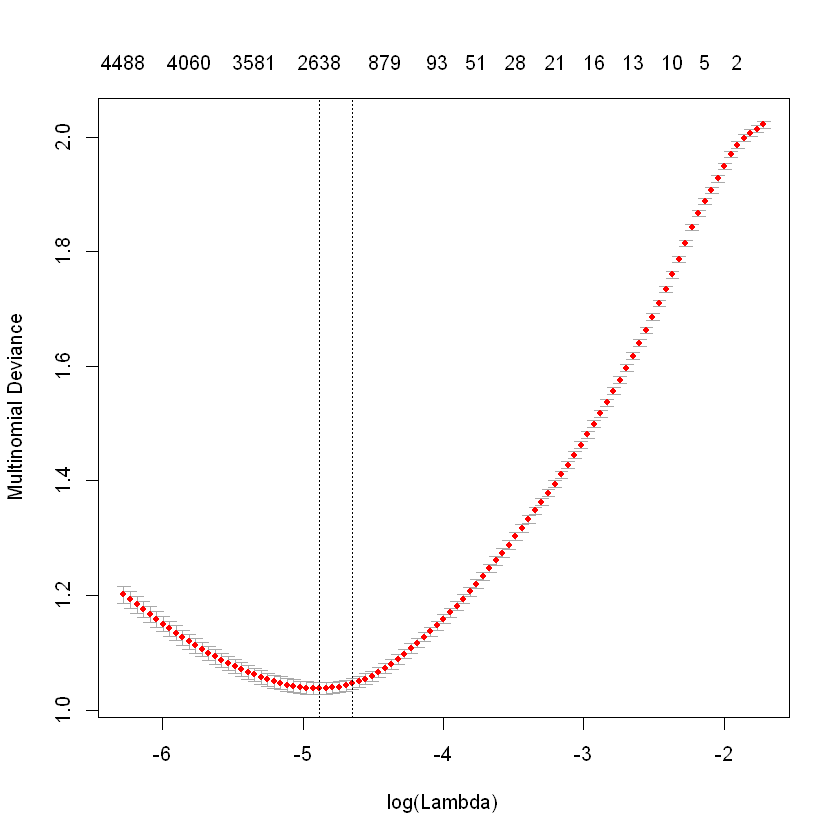

In [74]:
plot(multifit2)

## predict classes

In [78]:
pfit2 <- predict(multifit2, corpusmatrix2[(nrow(df)+1):nrow(corpusmatrix2),] , s="lambda.min", type="class")
write.csv(pfit2, "glm3.csv")

Warning message in cbind2(1, newx):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in cbind2(1, newx):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in cbind2(1, newx):
"Reached total allocation of 12190Mb: see help(memory.size)"Warning message in cbind2(1, newx):
"Reached total allocation of 12190Mb: see help(memory.size)"